In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import copy, math
import pandas as pd

In [36]:
def zscore_normal(x):
        mu = np.mean(x,axis=0)
        sigma = np.std(x,axis=0)
        x_norm = (x-mu)/sigma

        return (x_norm)
        
def mean_normal(x):
        mu = np.mean(x,axis=0)
        x_norm = (x-mu)/(np.max(x)-np.min(x))
                
        return (x_norm)

def r2_score(y,y_pred):
        y_avg = np.average(y, axis=0)
        num = 0
        den = 0
        for i in range(y.shape[0]):
                num = num + (y[i]-y_pred[i])**2
                den = den + (y[i]-y_avg)**2
        return (1 - (num/den))

def mode(row):
        unique_ele, count = np.unique(row, return_counts=True)
        max_idx = np.argmax(count)
        mode = unique_ele[max_idx]

        return mode

def accuracy(y_pred, y_true):
        c = 0
        for i in range (y_true.shape[0]):
                if y_true[i] == y_pred[i]:
                        c += 1
                
        return (c/y_true.shape[0])
        
def plot_cost(Cost_list, iterations):
        t = np.arange(0, iterations)
        plt.plot(t, Cost_list)
        plt.show

In [126]:
class LinearRegression:

    def __init__(self,x,w,b,l,alpha,epochs):
        self.x = x
        self.w = w
        self.b = b
        self.l = l
        self.alpha = alpha
        self.epochs = epochs


    def cost(self,y,w,b,l):
        m = self.x.shape[0]
        f_wb = np.dot(self.x,w) + b
        cost = (np.sum(np.square(f_wb-y))/(2*m)) + (l/(2*m)) * np.sum(np.square(w))
        return cost
    
    def grad_fn (self,y,w,b,l):
        m = self.x.shape[0]
        f_wb = np.dot(self.x, w) + b
        err = f_wb - y
        dj_dw = (np.dot(err, self.x) / m) + (l/m)*w
        dj_db = np.sum(err) / m
        return dj_dw, dj_db
    
    def grad_descent(self,y):
        J_history = []
        l = self.l
        _w = copy.deepcopy(self.w)
        _b = self.b

        for i in range(self.epochs):

            dj_dw,dj_db=self.grad_fn(y,_w,_b,l)

            _w = _w - self.alpha * dj_dw
            _b = _b - self.alpha * dj_db

            if i<100000:
                J_history.append(self.cost(y,_w,_b,l))

            if i% math.ceil(self.epochs / 10) == 0:
                print(f"Iteration {i:4d}: Cost {J_history[-1]:8.5f}   ")
        
        return _w, _b, J_history
    
    def predict(self,x,w,b):
        return (np.dot(x,w)+b)
    
class PolynomialRegression(LinearRegression):

    def __init__(self,x,w,b,l,alpha,epochs):
        self.x = x
        self.w = w
        self.b = b
        self.l = l
        self.alpha = alpha
        self.epochs = epochs

    def features(self):
        m = self.x.shape[1]
        data = pd.DataFrame(np.zeros((self.x.shape[0],self.n*m)))
        
        for j in range(m):   
            for i in range(1,self.n+1):  
                data.iloc[:,j+((i-1)*m)] = (self.x[:,j]**(i)).reshape(-1,1)
        x_poly = np.array(data.values.tolist())
        return x_poly

    def features_interacting(self):
        m = self.x.shape[1]
        data = pd.DataFrame(np.zeros((self.x.shape[0],(self.n+2)*m)))
        
        for j in range(m):   
            for i in range(1,self.n+3):  
                if i == self.n+1:
                    data.iloc[:,j+((i-1)*m)] = (self.x[:,j]*self.x[:,m-j-1]).reshape(-1,1)
                elif i == self.n+2:
                    data.iloc[:,j+((i-1)*m)] = ((self.x[:,j]**(self.n-1))*self.x[:,m-j-1]).reshape(-1,1)
                else:    
                    data.iloc[:,j+((i-1)*m)] = (self.x[:,j]**(i)).reshape(-1,1)
        x_poly = np.array(data.values.tolist())
        return x_poly
    
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self,x):
        sig = 1/(1+(np.exp(-x)))
        return sig
    
    def cost(self,x,y,w,b):
        m = x.shape[0]
        f_wb = self.sigmoid(np.dot(x,w) + b)
        cost = -np.sum(y * np.log(f_wb) + (1-y) * np.log(1 - f_wb)) / m
        return cost
    
    def grad_fn(self,x,y,w,b):
        m = x.shape[0]
        f_wb = self.sigmoid(np.dot(x,w) + b)
        err = f_wb - y
        dj_dw = np.dot(err, x) / m
        dj_db = np.sum(err) / m
        return dj_dw, dj_db
    
    def grad_descent(self,x,y,w_in,b_in,alpha,epoch):
        J_history = []
        w = copy.deepcopy(w_in)
        b = b_in
        for i in range(epoch):

            dj_dw,dj_db=self.grad_fn(x,y,w,b)

            w = w - alpha * dj_dw
            b = b - alpha * dj_db

            if i<100000:
                J_history.append(self.cost(x, y, w, b))

            if i% math.ceil(epoch / 10) == 0:
                print(f"Iteration {i:4d}: Cost {J_history[-1]:8.5f}   ")
        
        return w, b, J_history
    
    def predict(self,x,w,b):
        y_pred = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            y_pred[i] = self.sigmoid(np.dot(x[i],w)+b)
        return y_pred
    
    def fitnew(self,x,y,w_in,b_in,alpha,epochs):
        print("Fitting the given dataset..")
        self.theta = []
        self.cost_ = []
        w = copy.deepcopy(w_in)
        b = b_in
        # x = np.insert(x, 0, 1, axis=1)
        m = len(y)
        for i in np.unique(y):
            costx = []
            y_onevsall = np.where(y == i, 1, 0)
            # costlist = []
            for _ in range(epochs):
                dj_dw,dj_db=self.grad_fn(x,y_onevsall,w,b)

                w = w - alpha * dj_dw
                b = b - alpha * dj_db
            
                cost = self.cost(x,y_onevsall,w,b)
            print(f"For {i:4f}: Cost {cost:8.5f}   ")        
            self.theta.append((w, i))
            # self.cost.append((costlist,i))
        
        return self.theta, b
    
    def predictnew(self, X, w, b):
        # X = np.insert(X, 0, 1, axis=1)
        X_predicted = [max((self.sigmoid(i.dot(theta) + b), c) for theta, c in w)[1] for i in X ]

        return X_predicted


def multinomial_features(x, n):
        m = x.shape[0]

        terms = math.comb(n + 2, 2)
        features = np.zeros((m, terms + 3))

        for i in range(m):
            x1, x2, x3 = x[i]
            terms = [x1**m1 * x2**m2 * x3**m3 for m1 in range(n + 1) for m2 in range(n + 1) for m3 in range(n + 1) if m1 + m2 + m3 == n]
            features[i, :len(terms)] = terms
            features[i, -3:] = [x1, x2, x3]  # Add x1, x2, x3 as the last three columns

        return features
    
# def multinomial_features(x, n):
#     m = x.shape[0]
#     features_count = sum([math.comb(n + i - 1, i) for i in range(1, n + 2)])
        
#     features = np.zeros((m, features_count))

#     for i in range(m):
#         current_index = 0

#         for j in range(x.shape[1]):
#             features[i, current_index] = x[i, j]
#             current_index += 1

#         for d in range(2, n + 1):
#             for m1 in range(d + 1):
#                 for m2 in range(d - m1 + 1):
#                     m3 = d - m1 - m2
#                     features[i, current_index] = x[i, 0]**m1 * x[i, 1]**m2 * x[i, 2]**m3
#                     current_index += 1

#     return features

# Linear Regression

In [60]:
file=open('Lineardata_train.csv','r')
data=list(csv.reader(file))
x=[]
y=[]
for row in data:
    y.append(row[0])
for row in data:
    x.append(row[1:])
file.close()
x_train=x[1:24001]
y_train=y[1:24001]
x_train = np.array(x_train,dtype=float)
y_train = np.array(y_train,dtype=float)
y_train = y_train.transpose()

In [61]:
initial_w = np.zeros(x_train.shape[1])
initial_b = 0

x_train = zscore_normal(x_train)

iterations = 10000
alpha = 0.01
l = 10e-12

linear_model = LinearRegression(x_train,initial_w,initial_b,l,alpha,iterations)

w_final, b_final, J_hist = linear_model.grad_descent(y_train)

# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

y_pred = linear_model.predict(x_train,w_final,b_final)

Iteration    0: Cost 64100376.68833   
Iteration 1000: Cost  0.13959   
Iteration 2000: Cost  0.00506   
Iteration 3000: Cost  0.00506   
Iteration 4000: Cost  0.00506   
Iteration 5000: Cost  0.00506   
Iteration 6000: Cost  0.00506   
Iteration 7000: Cost  0.00506   
Iteration 8000: Cost  0.00506   
Iteration 9000: Cost  0.00506   


In [62]:
r2score = r2_score(y_train,y_pred)
print("R2 Score for train data: ",r2score)

R2 Score:  0.9999999999225841


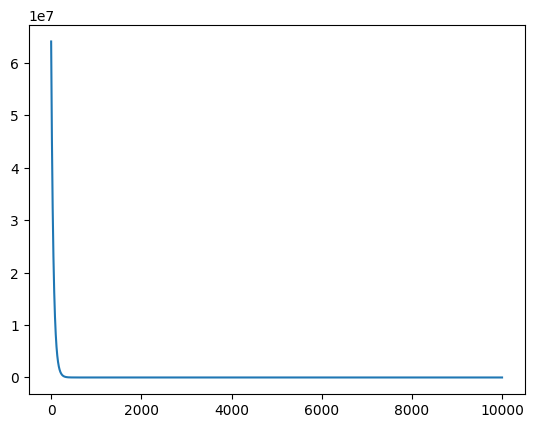

In [63]:
plot_cost(J_hist, iterations)

In [64]:
x_test=x[24001:]
y_test=y[24001:]
x_test = np.array(x_test,dtype=float)
y_test = np.array(y_test,dtype=float)
y_test = y_test.transpose()
x_test = zscore_normal(x_test)

In [106]:
y_test_pred = linear_model.predict(x_test, w_final, b_final)
print("R2 Score for test data: ",r2_score(y_test,y_test_pred))

R2 Score for test data:  0.9919622618692064


# Polynomial Regression

In [98]:
file=open('Polynomialdata_train.csv','r')
data=list(csv.reader(file))
x=[]
y=[]
for row in data:
    y.append(row[0])
for row in data:
    x.append(row[1:])
file.close()
x_train=x[1:24001]
y_train=y[1:24001]
x_train = np.array(x_train,dtype=float)
y_train = np.array(y_train,dtype=float)
y_train = y_train.transpose()

In [99]:
degree = 6

w=np.zeros([math.comb(degree+2, 2)+3])
b=0
iterations = 10000
alpha = 0.05
l = 10e-12

# x = regressor.features_interacting(degree,x)
x_train = multinomial_features(x_train,degree)
x_train = zscore_normal(x_train)

regressor = PolynomialRegression(x_train,w,b,l,alpha,iterations,)

w_final, b_final, J_hist = regressor.grad_descent(y_train)
# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

y_pred = regressor.predict(x_train,w_final,b_final)

Iteration    0: Cost 50345047206261.52344   
Iteration 1000: Cost 6089837.81863   
Iteration 2000: Cost 518.73033   
Iteration 3000: Cost 404.28068   
Iteration 4000: Cost 404.27795   
Iteration 5000: Cost 404.27795   
Iteration 6000: Cost 404.27795   
Iteration 7000: Cost 404.27795   
Iteration 8000: Cost 404.27795   
Iteration 9000: Cost 404.27795   
b,w found by gradient descent: 1756232.66,[8.18748204e+06 9.09868589e+05 9.58485317e+04 8.14448665e+03
 5.42152270e+02 2.74996651e+01 9.53302352e-01 6.66340413e+06
 5.78974032e+05 5.63013910e+04 4.25999484e+03 2.54200710e+02
 1.12519178e+01 3.37047446e+06 3.05409936e+05 2.58456618e+04
 1.68503788e+03 7.57562488e+01 1.30173083e+06 1.18937329e+05
 8.45575588e+03 4.17695615e+02 4.18163930e+05 3.40660153e+04
 1.92753443e+03 1.18107290e+05 8.42188709e+03 2.86914847e+04
 1.63150648e+01 2.23852091e-01 3.58875350e-01] 


In [100]:
r2score = r2_score(y_train,y_pred)
print("R2 Score for train data: ",r2score)

R2 Score:  0.9999999999930077


In [103]:
x_test=x[24000:]
y_test=y[24000:]
x_test = np.array(x_test,dtype=float)
y_test = np.array(y_test,dtype=float)
y_test = y_test.transpose()
x_test = multinomial_features(x_test,degree)
x_test = zscore_normal(x_test)

In [105]:
y_test_pred = regressor.predict(x_test, w_final, b_final)
print("R2 Score for test data: ", r2_score(y_test,y_test_pred))

R2 Score:  0.9919622618692064


# Logistic Regression

In [113]:
file=open('Classification_train.csv','r')
data=list(csv.reader(file))
x=[]
y=[]
for row in data:
    y.append(row[0])
for row in data:
    x.append(row[1:])
file.close()
x_train=x[1:24001]
y_train=y[1:24001]
x_train = np.array(x_train,dtype=float)
y_train = np.array(y_train,dtype=float)
y_train = y_train.transpose()

In [128]:
regressor = LogisticRegression()
w=np.zeros(x_train.shape[1])
b=0
x_train = mean_normal(x_train)

iterations = 1000
alpha = 5.0
w_final, b_final = regressor.fitnew(x_train, y_train, w, b, alpha, iterations)
# print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

y_pred = regressor.predictnew(x_train, w_final, b_final)

Fitting the given dataset..
For 0.000000: Cost  0.02719   
For 1.000000: Cost  0.01418   
For 2.000000: Cost  0.00503   
For 3.000000: Cost  0.04913   
For 4.000000: Cost  0.02296   
For 5.000000: Cost  0.02262   
For 6.000000: Cost  0.02930   
For 7.000000: Cost  0.05428   
For 8.000000: Cost  0.01285   
For 9.000000: Cost  0.01666   


In [132]:
print(f"Accuracy for train data: {accuracy(y_pred, y_train):0.6f}")

Accuracy for train data: 0.967667


In [133]:
x_test=x[24001:]
y_test=y[24001:]
x_test = np.array(x_test,dtype=float)
y_test = np.array(y_test,dtype=float)
y_test = y_test.transpose()
x_test = mean_normal(x_test)

In [135]:
y_test_pred = regressor.predictnew(x_test, w_final, b_final)
print(f"Accuracy for test data: {accuracy(y_test_pred, y_test):0.6f}")

Accuracy for test data: 0.959333
